# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Wintersemester 2022/23)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 07.11.2022


### Erster Vorlesungsteil:  
#### Dominante Strategien und Nash-Gleichgewichte am Beispiel der folgenden Spiele: 
#### Gefangenendilemma, Hirschjagt- und Angsthasen-Spiel


## Einführung

In diesem Python Notebook werden die in der Vorlesung definierten Gleichgewichtskonzepte (dominante Strategie, reine und gemischte Nash-Gleichgewichte) am Beispiel dreier simultaner, symmetrischer (2 Spieler)-(2 Strategien) Spiele illustriert. 
Zunächst wird das Python Modul "sympy" eingebunden, das ein Computer-Algebra-System für Python bereitstellt und symbolische Berechnungen und im speziellen Matrix-Berechnungen relativ einfach möglich macht.

In [1]:
from sympy import *
init_printing()

## Das Gefangenendilemma
Definition der Auszahlunsmatrix für Spieler A ( $\hat{\bf {\cal \$}}^A$ ):

In [2]:
D_A=Matrix([[-7,-1],[-9,-3]])
D_A

⎡-7  -1⎤
⎢      ⎥
⎣-9  -3⎦

Da sich das Spiel um ein symmetrisches (2 Personen)-(2 Strategien) Spiel handelt, erhält man die Auszahlunsmatrix für Spieler B durch die transponierte Matrix des Spielers A ( $\hat{\bf {\cal \$}}^B = (\hat{\bf {\cal \$}}^A)^T$ ): 

In [3]:
D_B=transpose(D_A)
D_B

⎡-7  -9⎤
⎢      ⎥
⎣-1  -3⎦

Unter Verwendung der gemischten Strategien $(\tilde{s}^A,\tilde{s}^B) \equiv (x,y)$ lässt sich eine gemischte Auszahlungsfunktion der Spieler ( Spieler A: ${\bf \tilde{\cal \$}}^A(x,y)$ , Spieler B: ${\bf \tilde{\cal \$}}^B(x,y)$ ) wie folgt definieren:




In [4]:
def Dollar(x,y,DM):
    GemischteAuszahlung=DM[0,0]*x*y+DM[0,1]*x*(1-y)+DM[1,0]*(1-x)*y+DM[1,1]*(1-x)*(1-y)
    return GemischteAuszahlung

Die gemischte Auszahlungsfunktion des Spielers A ( ${\bf \tilde{\cal \$}}^A(x,y)$ ) besitzt im oben definierten Gefangenendilenmma das folgende Aussehen: 

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import numpy as np

In [6]:
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(X, Y)
ZA = np.array(list(Dollar(X, Y,D_A)), dtype=np.float64)

In [7]:
params = {
    'figure.figsize'    : [11,7],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

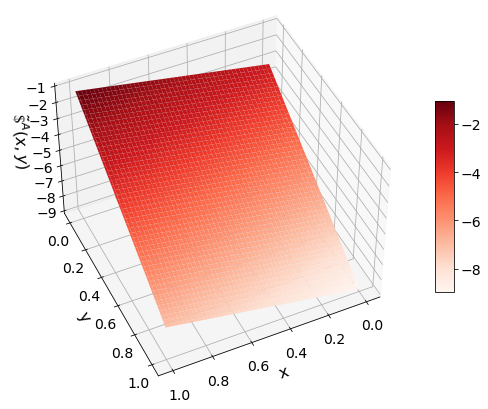

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, ZA, cmap=cm.Reds, linewidth=0, alpha=1)
ax.view_init(azim=65, elev=45)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$");

Die gemischte Auszahlungsfunktion des Spielers B ( ${\bf \tilde{\cal \$}}^B(x,y)$ ) besitzt im oben definierten Gefangenendilenmma das folgende Aussehen:

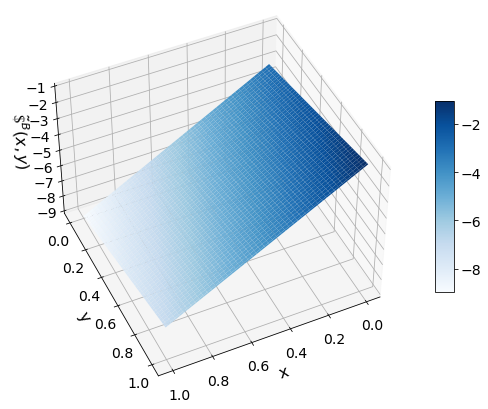

In [9]:
ZB = np.array(list(Dollar(X, Y,D_B)), dtype=np.float64)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, ZB, cmap=cm.Blues, linewidth=0, alpha=1)
ax.view_init(azim=65, elev=45)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^B(x,y)$");

Die Visualisierung kann man auch mittels der "Plotly Python Open Source Graphing Library" erstellen. In dieser Bibliothek ist es möglich interaktive Abbildungen in Python darzustellen ( siehe https://plotly.com/python/ ).

In [10]:
import plotly.graph_objects as go

fig = go.Figure(go.Surface(x=X, y=Y, z=ZA, colorscale='Reds', showscale=True))

fig.update_layout(autosize=True,
                  width=700, height=700,
                  margin=dict(l=15, r=50, b=65, t=90))
fig.update_layout(scene = dict(
                    xaxis_title='x',
                    yaxis_title='y',
                    zaxis_title='Auszahlung Spieler A'))

Wir konzentrieren uns zunächst auf die gemischte Auszahlungsfunktion des Spielers A und werden anhand der Struktur der Auszahlungsfläche die Eigenschaften der dominanten Strategie im Gefangenendilemma verdeutlichen. Die Frage lautet: Unter der Annahme das Spieler B eine feste gemischte Strategie y spielt, welche Strategie x sollte Spieler A wählen, so dass er seine Auszahlung maximiert?

Nehmen wir an, dass Spieler B die reine Strategie y=0 spielen würde, dann wäre es das Beste für Spieler A die reine Strategie x=1 zu spielen (siehe blaue Linie in der folgenden Abbildung).

Nehmen wir dagegen an, dass Spieler B die reine Strategie y=1 spielen würde, dann wäre es das Beste für Spieler A ebenfalls die reine Strategie x=1 zu spielen (siehe schwarze Linie in der folgenden Abbildung). Unanbhängig von der Wahl der Startegie des Spielers B, ist Spieler A immer veranlasst die Strategie x=1 zu spielen (siehe z.B die grüne Linie bei y=0.5); (x,y)=(1,1) ist somit die dominante Strategie und das einzige Nash-Gleichgewicht im Gefangenendilemma.

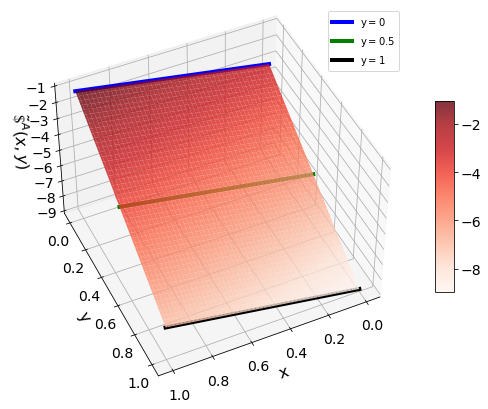

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, ZA, cmap=cm.Reds, linewidth=0, alpha=0.8)
ax.plot3D(X[0,:], Y[0,:], ZA[0,:], label=r"$\rm y=0$", color="blue", linewidth=4)
ax.plot3D(X[49,:], Y[49,:], ZA[49,:], label=r"$\rm y=0.5$", color="green", linewidth=4)
ax.plot3D(X[99,:], Y[99,:], ZA[99,:], label=r"$\rm y=1$", color="black", linewidth=4)
ax.view_init(azim=65, elev=45)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.legend()
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$");

## Das Hirschjagt-Spiel
Definition der Auszahlunsmatrix für Spieler A ( $\hat{\bf {\cal \$}}^A$ ):

In [12]:
D_A=Matrix([[2,4],[0,5]])
D_A

⎡2  4⎤
⎢    ⎥
⎣0  5⎦

Da sich das Spiel um ein symmetrisches (2 Personen)-(2 Strategien) Spiel handelt, erhält man die Auszahlunsmatrix für Spieler B durch die transponierte Matrix des Spielers A ( $\hat{\bf {\cal \$}}^B = (\hat{\bf {\cal \$}}^A)^T$ ): 

In [13]:
D_B=transpose(D_A)
D_B

⎡2  0⎤
⎢    ⎥
⎣4  5⎦

Die gemischte Auszahlungsfunktion des Spielers A ( ${\bf \tilde{\cal \$}}^A(x,y)$ ) besitzt im oben definierten Hirschjagt-Spiel das folgende Aussehen: 

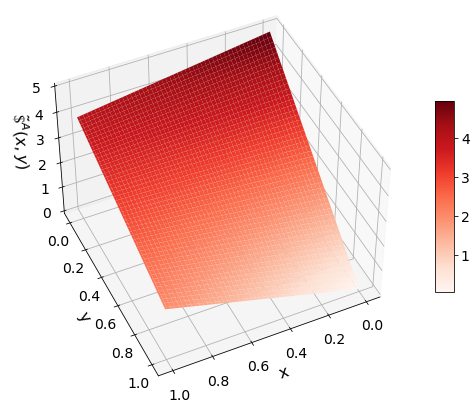

In [14]:
ZA = np.array(list(Dollar(X, Y,D_A)), dtype=np.float64)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, ZA, cmap=cm.Reds, linewidth=0, alpha=1)
ax.view_init(azim=65, elev=45)
#ax.view_init(azim=0, elev=0)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$");

Wir konzentrieren uns zunächst auf die gemischte Auszahlungsfunktion des Spielers A und werden anhand der Struktur der Auszahlungsflächen die Eigenschaften der reinen und gemischten Nash-Gleichgewichte verdeutlichen. Die Frage lautet: Unter der Annahme das Spieler B eine feste gemischte Strategie y spielt, welche Strategie x sollte Spieler A wählen, dass er seine Auszahlung maximiert?  

Nehmen wir an, dass Spieler B die reine Strategie y=0 spielen würde, dann wäre es das Beste für Spieler A auch die reine Strategie x=0 zu spielen. 

Nehmen wir dagegen an, dass Spieler B die reine Strategie y=1 spielen würde, dann wäre es das Beste für Spieler A ebenfalls die reine Strategie x=1 zu spielen. Da beim gemischten Nash-Gleichgewicht die Steigung in x-Richtung bei festem y=1/3 identisch verschwindet, verändert sich der Wert der Auszahlung für Spieler A bei Variation von x nicht. Diese Eigenschaft kann man visuell verdeutlichen, indem man sich die Auszahlungsfläche des Spielers A unter einem anderen Sichtwinkel betrachtet (siehe nachfolgende Animation).

In [15]:
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def init():
    ax.plot_surface(X, Y, ZA, cmap=cm.Reds, linewidth=0, alpha=1)
    ax.view_init(azim=65, elev=45)
    return fig,

def animate(i):
    ax.view_init(azim=65-i*65/60, elev=45-i*45/60)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=60,interval=50)

ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$")
fig.colorbar(surf, shrink=0.5, aspect=10, ax=ax)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Das Hirschjagt-Spiel besitzt somit ein gemischtes Nash-Gleichgewicht ($\tilde{s}^{A\star},\tilde{s}^{B\star}$) und zwei reine, symmetrische Nash-Gleichgewicht bei (x,y)=(0,0) und (x,y)=(1,1). Mittels der Bedingung für ein internes, gemischtes Nash-Gleichgewicht (partielle Ableitung der gemischten Auszahlungsfläche verschwindet)

$$
\left. \frac{ \partial {\bf \tilde{\cal \$}}^A(\tilde{s}^A,\tilde{s}^B)}{\partial \tilde{s}^A} \right|_{\tilde{s}^B=\tilde{s}^{B\star}}=3\, \tilde{s}^{B\star} -1 \stackrel{!}{=}0 \quad  \,\,\, \Rightarrow  \,\,\, \tilde{s}^{B\star}=\frac{1}{3}\approx0.33
$$

berechnet sich die spezielle Position der Strategienkombination des gemischten Nash-Gleichgewichts beim Hirschjagt-Spiel zu $(\tilde{s}^{A\star},\tilde{s}^{B\star})=(x,y)=(1/3 , 1/3)$.

Für Spieler A und B erhalten wir die folgenden Bedingungen:

In [16]:
x,y = symbols('x, y')
GlGemNashA=Eq(Dollar(x, y,D_A).diff(x), 0)
GlGemNashB=Eq(Dollar(x, y,D_B).diff(y), 0)
(GlGemNashB,GlGemNashA)

Lößt man diese Bedingung nach y auf und die Bedingung für Spieler B nach x, so erhält man die Strategienkombination des gemischten Nash-Gleichgewichts beim Hirschjagt-Spiel:  

In [17]:
(solve(GlGemNashB,x)[0],solve(GlGemNashA,y)[0])

Die definierte Auszahlungsmatrix des Hirschjagt-Spiels ist nur eine spezielle Wahl (Verkaufspreis des Hirsches ist 10$\$$ und wird durch die zwei Spieler geteilt, Verkaufspreis der vier Hasen ist 4$\$$ ). Im folgenden setzen wir den Verkaufspreis des Hirsches als variabel an (Parameter d) und berechnen das gemischte Nash-Gleichgewicht in Abhängigkeit von diesem Parameter. Für d=10 erhalten wir $(\tilde{s}^{A\star},\tilde{s}^{B\star})=(x,y)=(1/3 , 1/3)$ und für d=20 $(\tilde{s}^{A\star},\tilde{s}^{B\star})=(x,y)=(3/4 , 3/4)$.

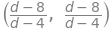

In [18]:
d = symbols('d')
D_A=Matrix([[2,4],[0,d/2]])
D_B=transpose(D_A)
GlGemNashA=Eq(Dollar(x, y,D_A).diff(x), 0)
GlGemNashB=Eq(Dollar(x, y,D_B).diff(y), 0)
(solve(GlGemNashB,x)[0],solve(GlGemNashA,y)[0])

Die folgende Animation zeigt die gemischte Auszahlungsfunktion des Spielers A im Hirschjagt-Spiel bei Variation des Parameters d im Bereich 10 bis 20. 

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def animate(i):
    ax.cla()
    ZA = np.array(list(Dollar(X, Y,D_A.subs(d,10+i))), dtype=np.float64)
    GemNash=float(solve(GlGemNashB,x)[0].subs(d,10+i))
    surf=ax.plot_surface(X, Y, ZA, cmap=cm.Reds, linewidth=0, alpha=1)
    ax.set_zlim(0,10)
    ax.set_xlabel(r"$\rm x$")
    ax.set_ylabel(r"$\rm y$")
    ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=10,interval=400)

fig.colorbar(surf, shrink=0.5, aspect=10, ax=ax)
ax.view_init(azim=0, elev=0)

plt.close(ani._fig)

HTML(ani.to_html5_video())

## Das Angsthasen-Spiel (Chicken Game) 
Definition der Auszahlunsmatrix für Spieler A ( $\hat{\bf {\cal \$}}^A$ ):

In [20]:
D_A=Matrix([[-10,2],[0,1]])
D_A

⎡-10  2⎤
⎢      ⎥
⎣ 0   1⎦

Da sich das Spiel um ein symmetrisches (2 Personen)-(2 Strategien) Spiel handelt, erhält man die Auszahlunsmatrix für Spieler B durch die transponierte Matrix des Spielers A ( $\hat{\bf {\cal \$}}^B = (\hat{\bf {\cal \$}}^A)^T$ ): 

In [21]:
D_B=transpose(D_A)
D_B

⎡-10  0⎤
⎢      ⎥
⎣ 2   1⎦

Die gemischte Auszahlungsfunktion des Spielers A ( ${\bf \tilde{\cal \$}}^A(x,y)$ ) besitzt im oben definierten Angsthasen-Spiel das folgende Aussehen: 

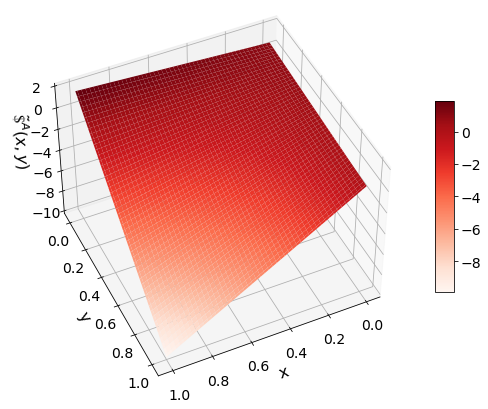

In [22]:
ZA = np.array(list(Dollar(X, Y,D_A)), dtype=np.float64)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, ZA, cmap=cm.Reds, linewidth=0, alpha=1)
ax.view_init(azim=65, elev=45)
#ax.view_init(azim=0, elev=0)
fig.colorbar(surf, shrink=0.5, aspect=10, ax=ax)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$");

Wir konzentrieren uns zunächst auf die gemischte Auszahlungsfunktion des Spielers A und werden anhand der Struktur der Auszahlungsflächen die Eigenschaften der reinen und gemischten Nash-Gleichgewichte verdeutlichen. Die Frage lautet: Unter der Annahme das Spieler B eine feste gemischte Strategie y spielt, welche Strategie x sollte Spieler A wählen, dass er seine Auszahlung maximiert?  

Nehmen wir an, dass Spieler B die reine Strategie y=0 spielen würde, dann wäre es das Beste für Spieler A die reine Strategie x=1 zu spielen. 

Nehmen wir dagegen an, dass Spieler B die reine Strategie y=1 spielen würde, dann wäre es das Beste für Spieler A die reine Strategie x=0 zu spielen. Da beim gemischten Nash-Gleichgewicht die Steigung in x-Richtung bei festem $y=\frac{1}{11}$ identisch verschwindet, verändert sich der Wert der Auszahlung für Spieler A bei Variation von x nicht. Diese Eigenschaft kann man visuell verdeutlichen, indem man sich die Auszahlungsfläche des Spielers A unter einem anderen Sichtwinkel betrachtet (siehe nachfolgende Animation).

In [23]:
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def init():
    ax.plot_surface(X, Y, ZA, cmap=cm.Reds, linewidth=0, alpha=1)
    ax.view_init(azim=65, elev=45)
    return fig,

def animate(i):
    ax.view_init(azim=65-i*65/60, elev=45-i*45/60)
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=60,interval=50)

fig.colorbar(surf, shrink=0.5, aspect=10, ax=ax)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
ax.set_zlabel(r"${\bf \tilde{\cal \$}}^A(x,y)$")

plt.close(ani._fig)

HTML(ani.to_html5_video())

Das Angsthasen-Spiel besitzt somit ein gemischtes Nash-Gleichgewicht ($\tilde{s}^{A\star},\tilde{s}^{B\star}$) und zwei reine, unsymmetrische Nash-Gleichgewicht bei (x,y)=(1,0) und (x,y)=(0,1). Mittels der Bedingung für ein internes, gemischtes Nash-Gleichgewicht (partielle Ableitung der gemischten Auszahlungsfläche verschwindet)

$$
\left. \frac{ \partial {\bf \tilde{\cal \$}}^A(\tilde{s}^A,\tilde{s}^B)}{\partial \tilde{s}^A} \right|_{\tilde{s}^B=\tilde{s}^{B\star}}=-10\, \tilde{s}^{B\star} +1 \stackrel{!}{=}0 \quad  \,\,\, \Rightarrow  \,\,\, \tilde{s}^{B\star}=\frac{1}{11}\approx0.091
$$

berechnet sich die spezielle Position der Strategienkombination des gemischten Nash-Gleichgewichts beim Hirschjagt-Spiel zu $(\tilde{s}^{A\star},\tilde{s}^{B\star})=(x,y)=(\frac{1}{11} , \frac{1}{11})$.

Für Spieler A und B erhalten wir die folgenden Bedingungen:

In [24]:
x,y = symbols('x, y')
GlGemNashA=Eq(Dollar(x, y,D_A).diff(x), 0)
GlGemNashB=Eq(Dollar(x, y,D_B).diff(y), 0)
(GlGemNashB,GlGemNashA)

Lößt man diese Bedingung nach y auf und die Bedingung für Spieler B nach x, so erhält man die Strategienkombination des gemischten Nash-Gleichgewichts beim Hirschjagt-Spiel:  

In [25]:
(solve(GlGemNashB,x)[0],solve(GlGemNashA,y)[0])